<a href="https://colab.research.google.com/github/dataeducator/capstone/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Submission:Capstone
(Capstone)

- Student Name: Tenicka Norwood
- Program Pace: self-paced
- Scheduled Project Review Time: Tuesday, September 19, 2023, 12 pm
- Instructor name: Morgan Jones
- Blog post Url: https://medium.com/@tenicka.norwood/bcf716cc249c

In this project I will be using __CRISP-DM__ process which has six phases:

* Business Understanding __&#8594;__ Understanding the project objectives, requirements, and constraints from a business perspective.

* Data Understanding __&#8594;__ Exploring and assessing the available data, its quality, structure, and initial insights.

* Data Preparation __&#8594;__ Cleaning, transforming, and preparing the data to be used for modeling, including handling missing values and outliers.

* Modeling __&#8594;__ Selecting and applying appropriate machine learning algorithms or techniques to build predictive or descriptive models.

* Evaluation __&#8594;__ Assessing the performance of the models and determining their suitability for solving the business problem.

* Deployment __&#8594;__ Integrating the chosen model into the business environment, making it accessible for end-users.

## Business Understanding

---





#### __Disclaimer:__
This Jupyter notebook and its contents are __intended solely for educational purposes__. The included business case and the results of the deep learning models should not be interpreted as medical advice, and have not received endorsement or approval from any professional or medical organization.

The models and outcomes presented here are for illustrative purposes __only__. Users should __not__ use these models or their outcomes for making real-world decisions without consulting appropriate domain experts and medical professionals. Any actions taken based on the information in this notebook are at the user's own risk. The dataset may not be fully representative of real-world clinical scenarios and should be used with caution in clinical decision-making. Always consult a qualified healthcare professional for medical advice and treatment.
The author and contributors of this notebook disclaim any liability for the accuracy, completeness, or efficacy of the information provided.

#### __Overview:__

The primary objective of this project is to develop a robust predictive model that is capable of accurately identifying individuals at high risk of heart failure based on demographic and clinal data. By harnessing the power of machine learning, Zephyr Healthcare Solutionss aims to signifantly improve patient hospitalizations, and ehannce overal quality of their cardiac care.

#### __Objectives and Goals:__
Zephyr's objective is to leverage machine learning models including optimized neural network based models for precise heart disease detection, aligning within our commitment to advancing diagnostic accuracy and patient care.

#### __Problem Statement:__
In the realm diagnostics, timely and accurate diseease detection is crucial to improving patient health outcomes. Zephyr Healthcare recognizes the potential of machine learning techniques in achieving this goal. The challenge lies in developing a robust predictive model that harnesses the power of neural networks or ensemble methods to identify cardiac conditions with a focus on achieving high recall rates.

#### __Stakeholder:__
Zephyr Healthcare Solutions

#### __Business Case:__  
As a newly appointed lead of the data analytics team at Zephyr Healthcare Solutions,my team has been tasked with enhancing the company's diagnostic capabilities through advanced predictive modeling techniques.

#### __Success Criteria:__
We will prioritize recall in this project over accuracy. We will also aim for balance between recall (sensitivity) while maintaining a high level of precision (specificity). With these objectives in mind, we aim to reduce the number of false positives and increase the model's ability to correctly identify patients with pneumonia. In this context, false positives could lead to unnecessary treatment or interventions.


* __True Positives (TP)__: This represents the number of instances that the model correctly predicted that a person is at risk for heart disease.

* __True Negatives (TN):__ This represents the number of instances that the model correctly predicted that a person is not at risk for heart disease.

* __False Positives (FP):__ This represents the number of instances where the model incorrectly predicted that a person is at risk for heart disease, when they are not at risk.

* __False Negatives (FN):__ This represents the numbeer of instances where the model incorrectly is not at risk for heart disease, when they are at risk.

<br>
\begin{gathered}   
Precision =  \frac{True\ Positive}{True\ Positive + False\ Positive}
\end{gathered}
<br>

</br>

</br>
\begin{gathered}
Recall = \frac{True\ Positive}{False\ Negative + True\ Positive}
\end{gathered}
<br>

Our model will be successful where:

</br>
\begin{gathered}
Recall > 0.85
\end{gathered}
<br>

## Data Understanding

---
### Data Exploration
#### __Obtaining  Dataset for Prediction with Machine  Learning__
1. __Create or Log in to Your Kaggle Account:__
    If you do not already have a Kaggle account, create one. If you have an account log in.
2. __Access Your Account Settings:__
  - Click on your profile picture in the top right corner of the Kaggle website.
  - Select __`Account`__ from the dropdown menu.
    
3. __Navigate to the API Section:__
  - Scroll down to the __`API`__ section on the account page.

4. __Create New API Token:__
  - Click on the __`Create New API Token`__ button. This will trigger the download of a file named `kaggle.json`.
5. __Move API Token to Google Drive(We will be using Google Colab)__
 - We will be using Gogle Colab. Please upload the `kaggle.json` file to a folder called kaggle your Gogle Drive. This will allow you to access the Kaggle API from your Colab notebooks.



In [1]:
# Mount your Google Drive to '/content/drive'
from google.colab import drive
drive.mount('/content/drive')

# Create a directory name '.kaggle' in the root directory
!mkdir /root/.kaggle

# Copy the 'kaggle.json' file from the specified location in Google Drive to the kaggle directory
# !cp /content/drive/MyDrive/your_folder_name/kaggle.json
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle/kaggle.json

# Set permissions to protect your API key and only the owner can use the credentials held within your json file
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset 'heart-failure-predition' using the Kaggle API
!kaggle datasets download -d fedesoriano/heart-failure-prediction

# Unzip the downloaded dataset and place it in the specified location in Google Drive
!unzip heart-failure-prediction.zip -d /content/drive/MyDrive/kaggle/heart-failure-prediction



Mounted at /content/drive
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 2.53MB/s]
Archive:  heart-failure-prediction.zip
replace /content/drive/MyDrive/kaggle/heart-failure-prediction/heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/kaggle/heart-failure-prediction/heart.csv  


### Importing essential libraries and visualization packages

In this section, we begin by importing key libraries and visualization pakage to help set the stage for data analysis and modeling. These libraries include:
* `pandas`
* `numpy`
* `seaborn`
* `scikit-learn`

which provide tools for data manipulation, visualization and machine learning.

Additionally, we use `tensorflow` and `keras` for neural network based modeling. We will implement techniques like feature selection and hyperparameter tuning to enhance model performance.

In [2]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import BinaryAccuracy, Recall
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action ='ignore', category = DeprecationWarning)
warnings.simplefilter(action ='ignore', category = FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")


# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Used for working with the z-score
from scipy import stats

# Used for working with long url
from urllib.parse import urlencode

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Filter warnings from pandas
pd.options.mode.chained_assignment = None

### Checkin Library Versions

In this section, we start by verifying the versions of key libraries that for the backbone of our data analysis and modeling pipeline. We will inspect the versions of pandas, numpy, seaborn and TensorFlow to ensure the compability and leverage the latest features for our analysis.

In [3]:
# Check Pandas version
print("Pandas version")
pd.__version__

Pandas version


'1.5.3'

In [4]:
# Check Numpy version
print("Numpy version")
np.__version__

Numpy version


'1.23.5'

In [5]:
# Check Seaborn version
print("Seaborn version")
sns.__version__

Seaborn version


'0.12.2'

In [6]:
# Check Tensorflow version
print("Tensorflow version")
tf.__version__

Tensorflow version


'2.13.0'

### __Data Description:__
The Heart Failure Prediction dataset is a collection of clinical and demographic features that was created by combining five heart datasets aimed at predicting the likelihood of heart failure.

| Feature           | Data Type | Description                                                         | Type       |
|-------------------|-----------|---------------------------------------------------------------------|------------|
| `Age`             | Numeric   | Age of the patient [years]                                          | Continuous |
| `Sex`             | Categorical | Sex of the patient [M: Male, F: Female]                              | Categorical |
| `ChestPainType`   | Categorical | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] | Categorical |
| `RestingBP`       | Numeric   | Resting blood pressure [mm Hg]                                       | Continuous |
| `Cholesterol`     | Numeric   | Serum cholesterol [mm/dl]                                           | Continuous |
| `FastingBS`       | Categorical | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]      | Categorical |
| `RestingECG`      | Categorical | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy] | Categorical |
| `MaxHR`           | Numeric   | Maximum heart rate achieved [Numeric value between 60 and 202]        | Continuous |
| `ExerciseAngina`  | Categorical | Exercise-induced angina [Y: Yes, N: No]                                | Categorical |
| `Oldpeak`         | Numeric   | Oldpeak = ST [Numeric value measured in depression]                   | Continuous |
| `ST_Slope`        | Categorical | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] | Categorical |

### __Data Source__
The dataset was compiled by Fedesoriano on Kaggle from a set of datasets included datasets that were orginially hosted on the University of California at Irvine's Machine Learning Inventory [click here](https://archive.ics.uci.edu/dataset/45/heart+disease)
####__Sources:__
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [September 17, 2023] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.
### Data Visualization

In this section, we will begin by setting up the environment with the necessary libraries imported. After ensuring that we are in the correct working directory, we will load and inspect the data set. There is a class called `ScrubData` that we will use to preprocess the data to identify and handle missing or incomplete data entries. We will follow up with the `ExploreData` class to review the dataset features. Finally, the `AnalyzeData` class will help use identify patterns in the data.

In [7]:
# Import os library
import os

# Print the current working directory
print(os.getcwd())

# Define the file path for the dataset
# file_path = f'/content/drive/MyDrive/your_dateset_directory_name/'
file_path= f'/content/drive/MyDrive/kaggle/heart-failure-prediction/'

# Change  the current working directory to the specified path
os.chdir(file_path);

# Print the updated current working directory
print(os.getcwd())

# Load the dataset 'heart.cv' into a DataFrame 'df'
df = pd.read_csv('heart.csv');

# Display the first 10 rows of the DataFrame
df.head(10)

/content
/content/drive/MyDrive/kaggle/heart-failure-prediction


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.00,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.00,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.00,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.50,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.00,Up,0


#### __Check for missing values__



The python class `ScrubData` is designed for initial cleaning the dataset to facilitate exploration. This class helps to identify and address placeholders within the data and drops rows of missing data. It is our starting point for preprocessing the dataset before analysis.

In [8]:
class ScrubData:
    def __init__(self, data):
        """
        Constructor for the ScrubData class.

        Parameters:
        - data (pandas DataFrame): The dataset to be explored

        Initializes the data attribute.
        """

        self.data = data


    def check_placeholders(self):
        """
        Checks and displays the presence of placeholders throughout the entire dataframe.
        Placeholders checked: '?', '#', 'NaN','null, 'N/A,'-'.
        """
        placeholders = ['?', '#', 'NaN', 'null', 'N/A', '-']
        placeholder_mask = self.data.isin(placeholders)

        if placeholder_mask.any().any():
            print('\nPlaceholders Detected:')
            display(placeholder_mask)
        else:
            print('\nNo Placeholders Detected.')

    def clean(self):
        """
        Perform data cleaning operations.
        """
        cleaned_data = self.data.dropna() # Drop rows with missing data

        return cleaned_data

Next we instantiate the `ScrubData` class, passing the dataset as a parameter. Then we use the `clean` method of the `ScrubData` class to preprocess the data and store the cleaned DataFrame in a variable called `cleaned_data`.

In [9]:
# Create an instance of the "ScrubData" class
scrubbed_data = ScrubData(data = df)

# Clean the dataset using the "clean" method of the "ScrubData" class
cleaned_data = scrubbed_data.clean()


We will use the `cleaned_data` variable in our data exploration, but first we will need a class that has methods to explore datatset. The `ExploreData` class helps us examine the structure of the dataset, check for duplicates and visualize the distribution of specific variables like `Sex` within the dataset.

In [10]:
class ExploreData:
    def __init__(self,data):
        """
        Constructor for the ExploreData class.

        Parameters:
        - data (pandas DataFrame): The dataset to be explored.

        Initializes the data attribute
        """
        self.data = data

    def examine_structure(self):
        """
        Prints the shape of the dataset and displays the first few rows.
        Also displays the data information including the number of rows and columns in the dataset.
        """
        print('Data Shape:')
        display(self.data.shape)

        print('Data Structure:')
        display(self.data.head())

        print('\nData Information:')
        display(self.data.info())

        print('\nData Statistics:')
        display(self.data.describe())

        print('\nData Columns with Missing Values:')
        display(self.data.isnull().sum())

    def data_duplicated(self):
        """
        Checks and displays the number of duplicate rows in the dataset.
        """
    def check_duplicates(self):

        """
        Checks and displays the number of duplicate rows in the dataset.
        """
        num_duplicates = self.data_duplicated().sum()
        print (f'\nNumber of Duplicate Rows: {num_duplicates}')

    def drop_duplicates(self):
        """
        Drops the duplicate rows from the dataset.
        """
        self.data.drop_duplicates(inplace = True)
        print("Duplicate rows dropped.")

    def generate_correlation_map(self, title):
        """
        Generates and displays a correlation matrix heatmap for the dataset.

        Parameters:
        -title(str): The title of the correlation map
        """

        correlation_matrix = self.data.corr()

        # Create a figure and set the title
        plt.figure(figsize = (30,25))
        plt.suptitle(title)

        # Generate the correlation heatmap
        sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues')

        # Show the correlation map
        plt.show()

    def plot_pairplot(self, correlation_table):
        # Get the columns from the correlation table
        columns = list(correlation_table.index.levels[0])

        # Filter the data based on the columns
        data_filtered = self.data[columns]

        # Create a pairplot using the filtered data
        pairplot = sns.pairplot(data_filtered, diag_kind="kde", markers=".", height=2)

        # Customize the scatter matrix plot
        for ax in pairplot.axes.flat:
            ax.xaxis.label.set_rotation(90)
            ax.yaxis.label.set_rotation(0)
            ax.yaxis.label.set_ha('center')
            ax.get_yaxis().set_label_coords(-0.5, 0.5)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18)
            ax.set_yticklabels(ax.get_yticklabels(), rotation=90, ha='center', fontsize=18)

        # Show the plot
        plt.tight_layout()
        plt.show()

    def generate_correlation_table(self, threshold_min = 0.6, threshold_max = 1.0):
        """
        Generates a correlation table with filtered correlation pairs within specified thresholds.

        Parameters:
        - threshold_min (float): The minimum threshold for correlation values (inclusive).
                                 Default is 0.6.
        - threshold_max (float): The maximum threshold for correlation values (exclusive).
                                 Default is 1.0.

        Returns:

        - filtered_df (pandas DataFrame): The filtered correlation table.
        """

        correlation_matrix = self.data.corr().abs()

        correlation_df = correlation_matrix.stack().reset_index()
        correlation_df.columns = ['feature1', 'feature2', 'correlation']

        filtered_df = correlation_df[
            (correlation_df['correlation'] > threshold_min) & (correlation_df['correlation'] < threshold_max)
        ]

        filtered_df.drop_duplicates(inplace = True)
        filtered_df.set_index(['feature1', 'feature2'], inplace = True)
        filtered_df.columns = ['correlation']

        return filtered_df

    def plot_sex_distribution(self):
        """
        Plots the Sex distribution from the dataset.
        """
        plt.style.use('fivethirtyeight')
        sex_counts = self.data['Sex'].value_counts()
        sex_labels = ['F', 'M']
        sex_values = [sex_counts[0], sex_counts[1]]

        plt.figure(figsize = (8,6))
        ax = sns.barplot(x = sex_labels, y = sex_values, color = 'blue')

        plt.xlabel('Sex', fontsize = 14, weight = 'bold')
        plt.ylabel('Number of Patients', fontsize = 14, weight = 'bold')
        plt.title('Sex Distribution of Cardiac Patients',fontsize = 18, weight = 'bold')



        plt.show()

    def plot_target_distribution(self):
        """
        Plots the gender distribute of the target variable from the dataset.
        """

        target_data = self.data['HeartDisease']
        target_labels = ['No Heart Disease', 'Heart Disease']
        target_values = [target_data[target_data == 0].count(), target_data[target_data == 1].count()]


        plt.figure(figsize = (8,6))
        ax = sns.countplot(x = target_labels, data = target_data, color = 'blue')

        plt.xlabel('Heart Disease', fontsize = 14, weight = 'bold')
        plt.ylabel('Percentage of Patients', fontsize = 14, weight = 'bold')
        plt.title('Number of Patients with Heart Disease',fontsize = 18, weight = 'bold')

        plt.show()

#### __Display basic statistics__

First, we will instantiate the `ExploreData` class and pass the cleaned dataset `cleaned_data` as a parameter to initialize the class. Next we will use the `examine_structure()` method to gather initial insights into the datasets structure, including basic statistics, data shape, datatypess and any missing values.

In [11]:
# Create an instance of the ExploreData class
data_exploration = ExploreData(data=cleaned_data)

# Examine the structure of the dataset
data_exploration.examine_structure()

Data Shape:


(918, 12)

Data Structure:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None


Data Statistics:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00



Data Columns with Missing Values:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
# Generate a correlation table for the cleaned dataset
# The correlation table will include only correlations between 0.2 and 1.0.
correlation_table = data_exploration.generate_correlation_table(0.2, 1.0)

# Display the correlation table using the "display" function.
display(correlation_table)

correlation
feature1     feature2                 
Age          RestingBP            0.25
             MaxHR                0.38
             Oldpeak              0.26
             HeartDisease         0.28
RestingBP    Age                  0.25
Cholesterol  FastingBS            0.26
             MaxHR                0.24
             HeartDisease         0.23
FastingBS    Cholesterol          0.26
             HeartDisease         0.27
MaxHR        Age                  0.38
             Cholesterol          0.24
             HeartDisease         0.40
Oldpeak      Age                  0.26
             HeartDisease         0.40
HeartDisease Age                  0.28
             Cholesterol          0.23
             FastingBS            0.27
             MaxHR                0.40
             Oldpeak              0.40

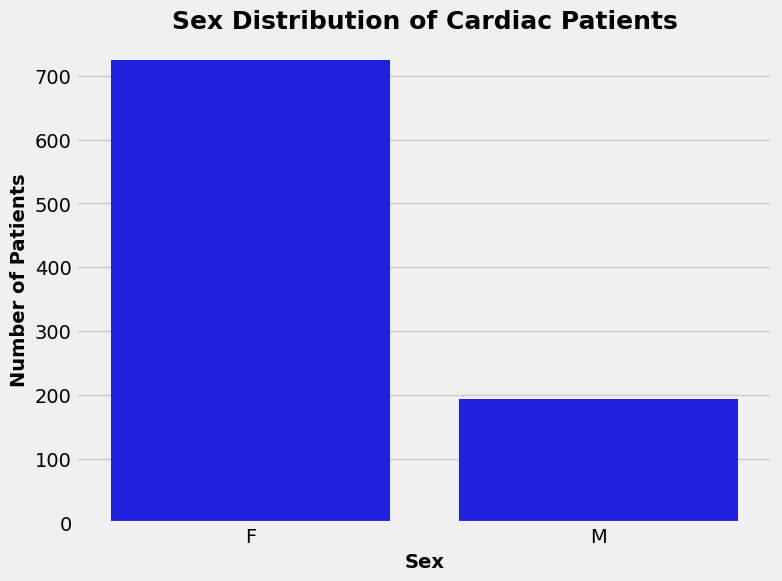

In [13]:
# Plot the sex distribution of the data
data_exploration.plot_sex_distribution()

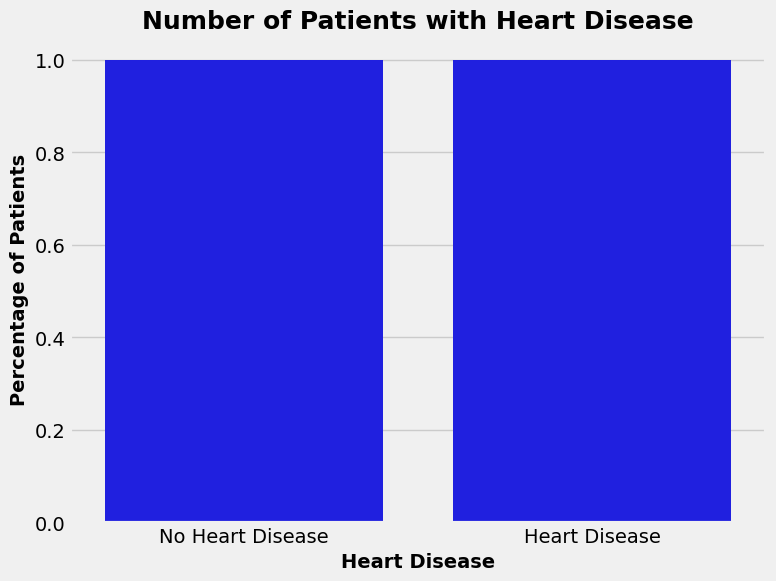

In [14]:
# Plot Patient Heart Disease distribution
data_exploration.plot_target_distribution()

The `AnalyzeData` class helps us perform analysis on the provided dataset and includes methods like `_plot_distribution` which helps us visualize the distribution of various features including:
* Sex
* Chest Pain Type
* Exercise Induced Angina
* ST Slope
* Fasting Blood Sugar

These visualixation help to provide insights into how different features relate to the presence or absence of heartt disease which is crucial for understading the impact of various factors on hear health.

In [15]:
class AnalyzeData:
    def __init__(self, data):
        """
        Constructor for the AnalyzeData class.

        Parameters:
        - data (pandas DataFrame): The dataset to be analyzed.

        Initializes the data attribute.
        """
        self.data = data
        self.target_labels={ 0: "No Heart Disease",1: "Has Heart Disease" } # Initialize target labels

    def _plot_distribution(self, x, title, xlabel, ylabel):
        """
        Plot the distribution of a categorical variable.

        Parameters:
        - x (str): The column name for x-axis.
        - title (str): The title of the plot.
        - xlabel (str): Label for the x-axis.
        - ylabel (str): Label for the y-axis.
        """
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=self.data, x=x, hue='HeartDisease', palette='pastel') # Plot countplot
        plt.legend(title="Heart Disease")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title, fontsize=18)

        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold') # Add annotations
        plt.show() # Display the plot

    def _plot_density(self, variable, title, xlabel):
        """
        Plot the density of a numerical variable.

        Parameters:
        - variable (str): The column name for the variable.
        - title (str): The title of the plot.
        - xlabel (str): Label for the x-axis.
        """
        plt.figure(figsize=(10, 6))
        for label, color in zip(self.data['HeartDisease'].unique(), sns.color_palette('pastel')):
            subset = self.data[self.data['HeartDisease'] == label]
            sns.kdeplot(subset[variable], color=color, label=f'{label}') # Plot kdeplot
        plt.legend(title="Heart Disease")
        plt.xlabel(xlabel)
        plt.ylabel('Density')
        plt.title(title, fontsize=18)
        plt.show()

    def analyze(self):
        """
        Perform analysis on the dataset and generate plots.
        """

        # Map target labels to descriptive names
        self.data['HeartDisease'] = self.data['HeartDisease'].map(self.target_labels)

        # Categorical data plots
        self._plot_distribution('Sex', 'Distribution of Heart Disease by Sex', 'Number of Patients', 'Sex')
        self._plot_distribution('ChestPainType', 'Distribution of Heart Disease by Chest Pain Type', 'Chest Pain Type', 'Number of Patients')
        self._plot_distribution('FastingBS', 'Distribution of Heart Disease by Fasting Blood Sugar', 'Fasting Blood Sugar (1: > 120 mg/dl, 0: <= 120 mg/dl)', 'Number of Patients')
        self._plot_distribution('RestingECG', 'Distribution of Heart Disease by Resting Electrocardiographic Results', 'Resting Electrocardiographic Results', 'Number of Patients')
        self._plot_distribution('ExerciseAngina', 'Distribution of Heart Disease by Exercise Induced Angina', 'Exercise Induced Angina (1: Yes, 0: No)', 'Number of Patients')
        self._plot_distribution('ST_Slope', 'Distribution of Heart Disease by ST Slope', 'ST Slope', 'Number of Patients')

        # Numerical data plots
        self._plot_density('Age', 'Density Plot of Heart Disease by Age', 'Age (years)')
        self._plot_density('RestingBP', 'Density Plot of Heart Disease by Resting Blood Pressure ', 'Resting Blood Pressure (mm Hg)')
        self._plot_density('Cholesterol', 'Density Plot of Heart Disease by Cholesterol' , 'Cholesterol (mm/dl)')
        self._plot_density('MaxHR', 'Density Plot of Heart Disease by Max Heart Rate ', 'Max Heart Rate')
        self._plot_density('Oldpeak', 'Density Plot of Heart Disease by OldPeak', 'OldPeak (ST)')


The `AnalyzeData` class is designed to analyze a given dataset, generating visualizations to provide insights into heart disease distribution based on various factors. It takes a panda `DataFrame` as input during instantiation. The class provides methods for plotting distributions of categorical variables and densities of numerical variables related to heart disease. For instance, you can use this class to analyze and visualize the distribution of heart disease based on factors such as sex, chest pain type, fasting blood sugar levels, and more.

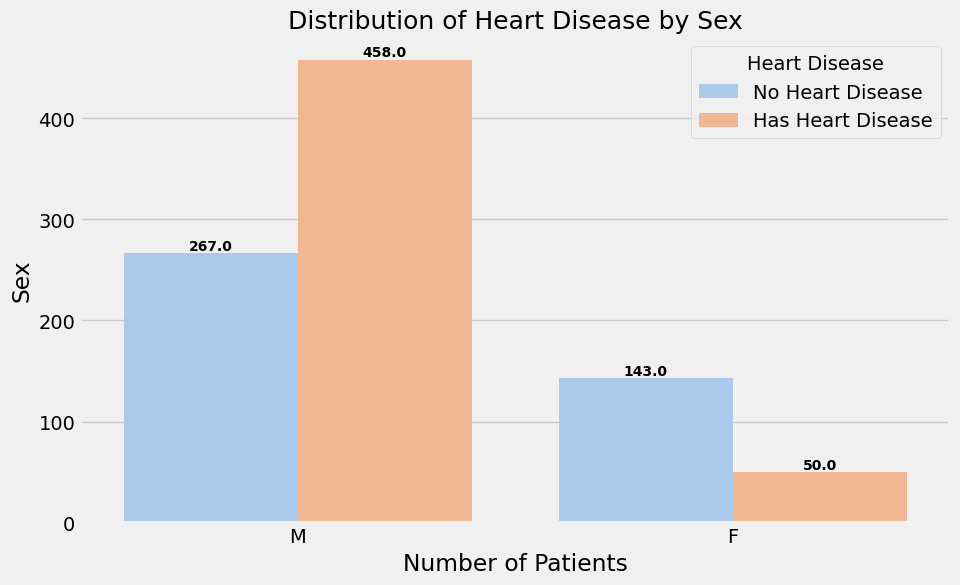

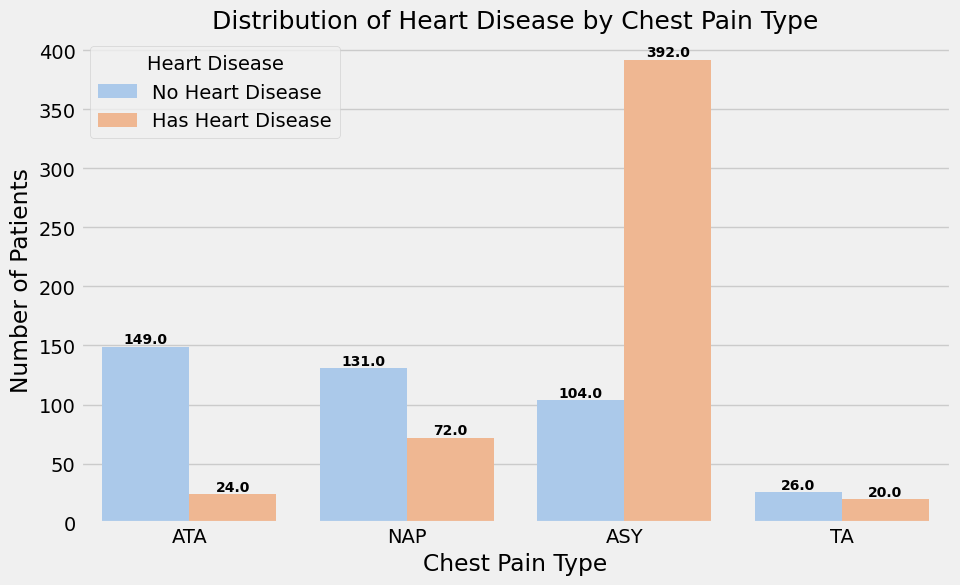

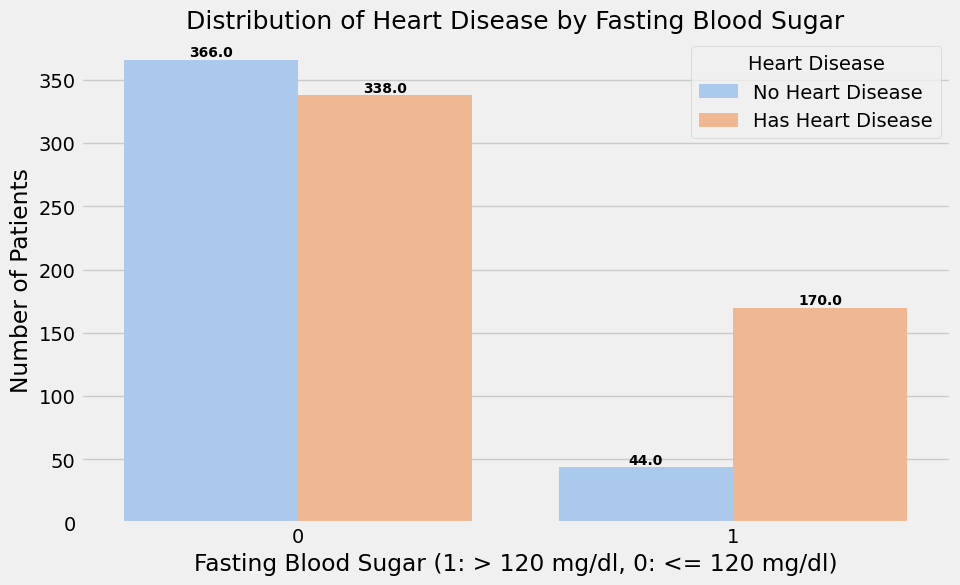

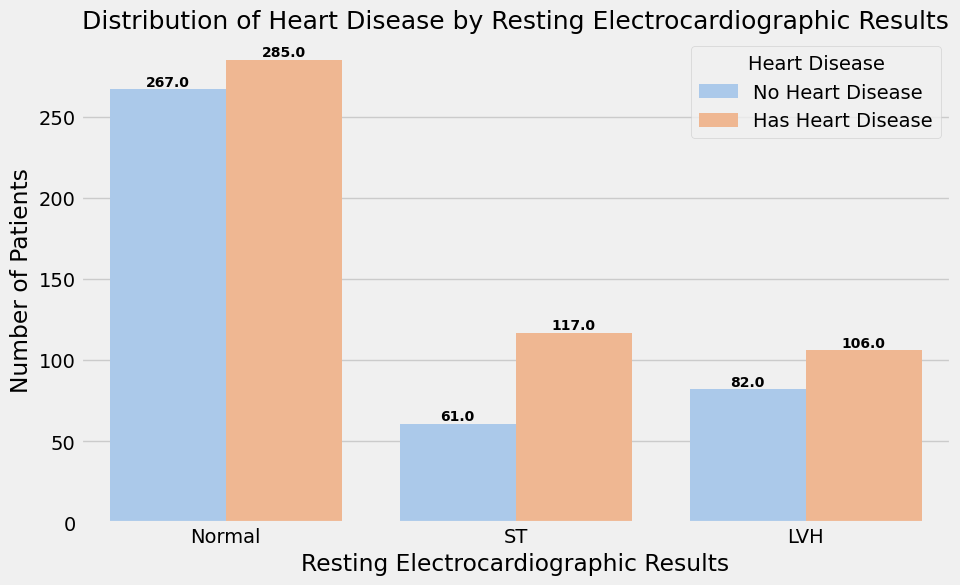

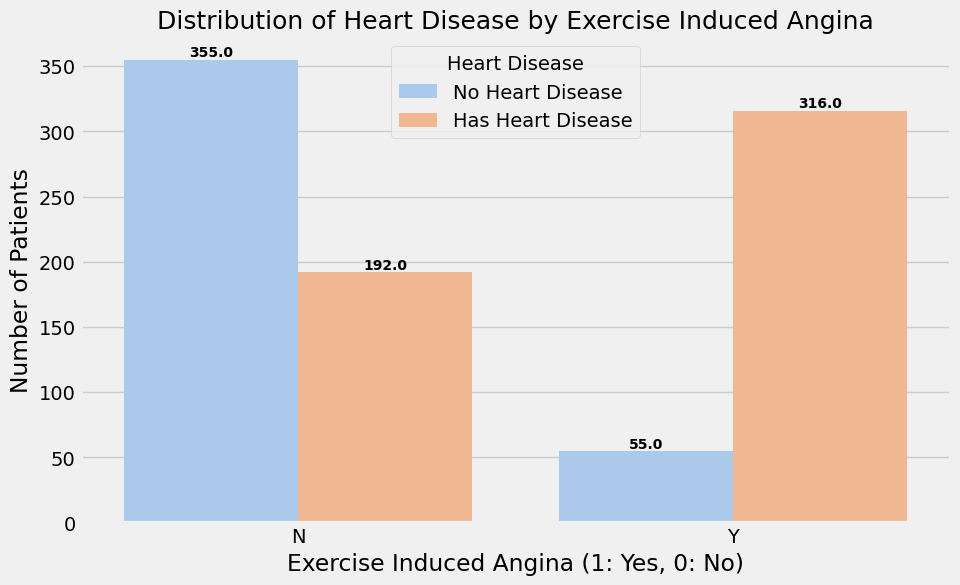

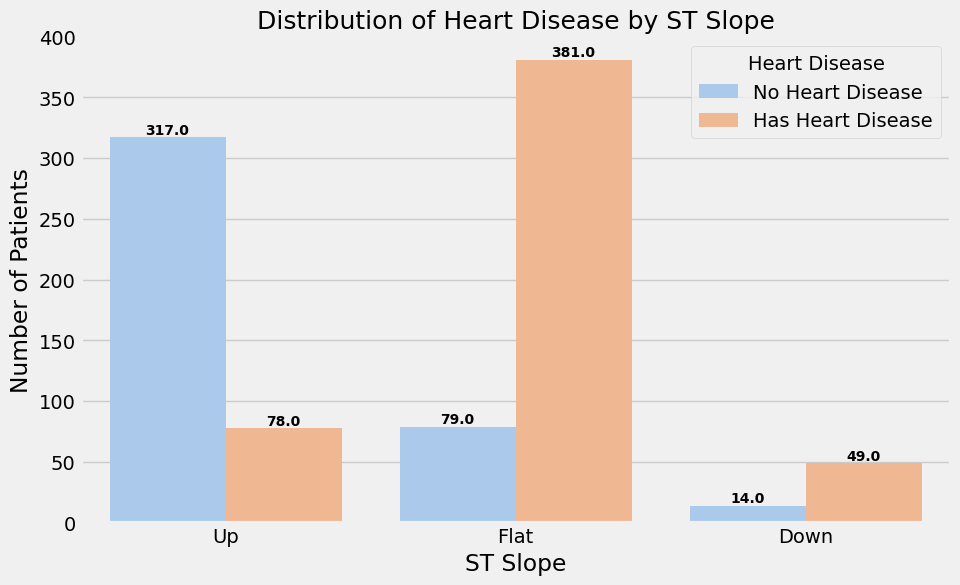

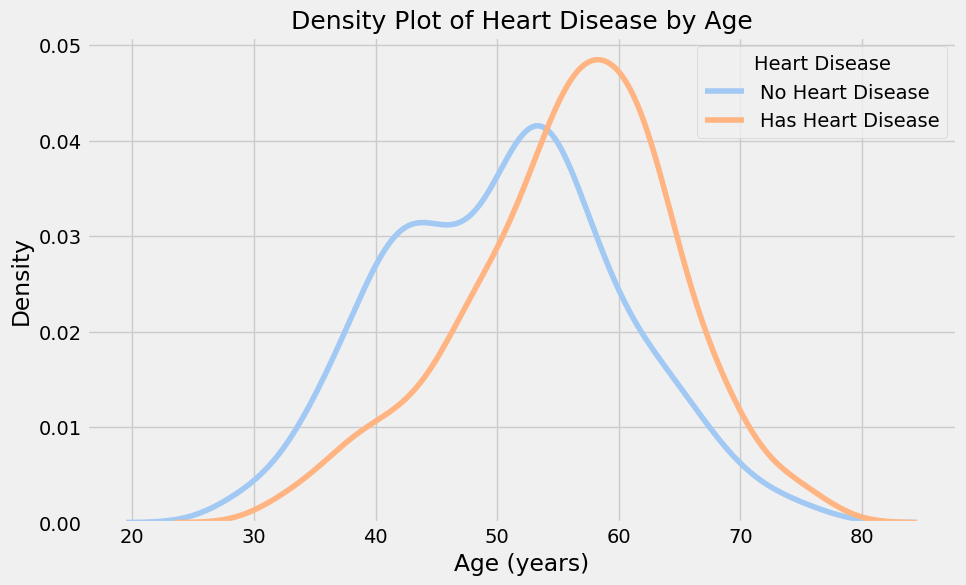

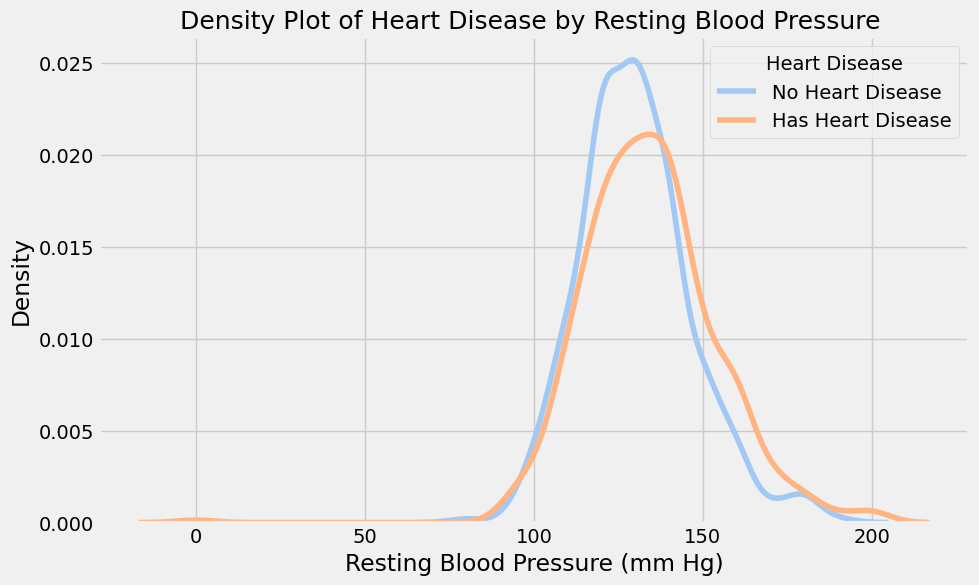

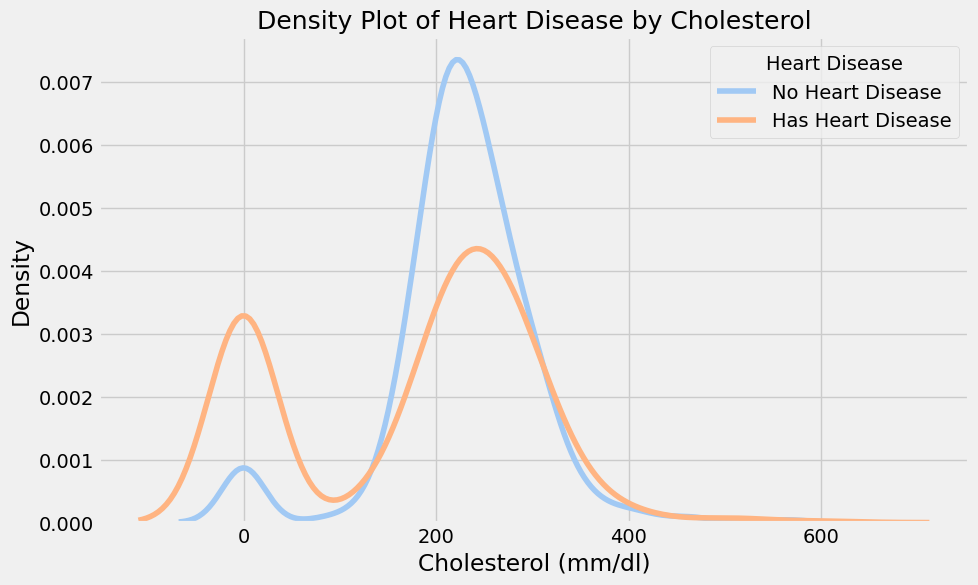

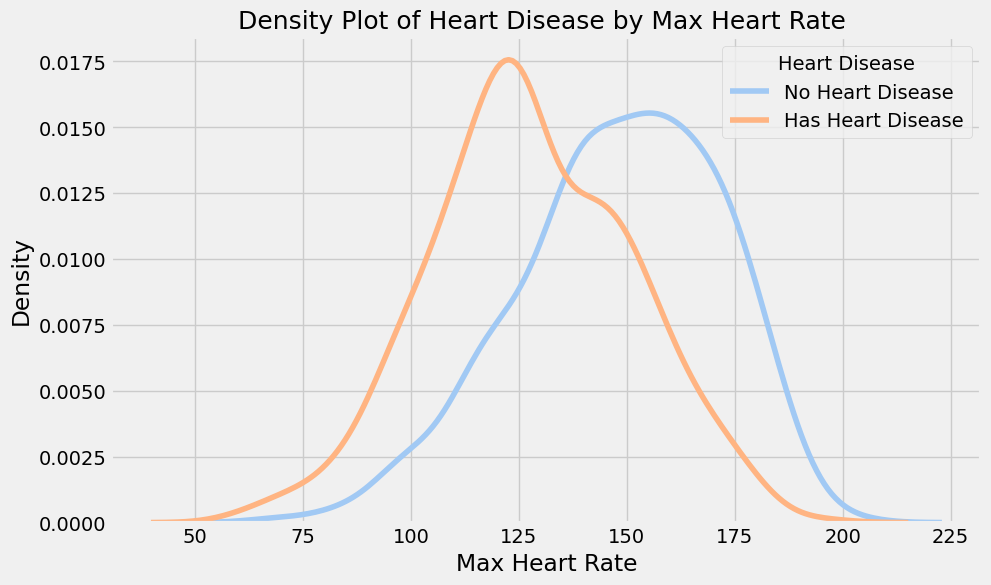

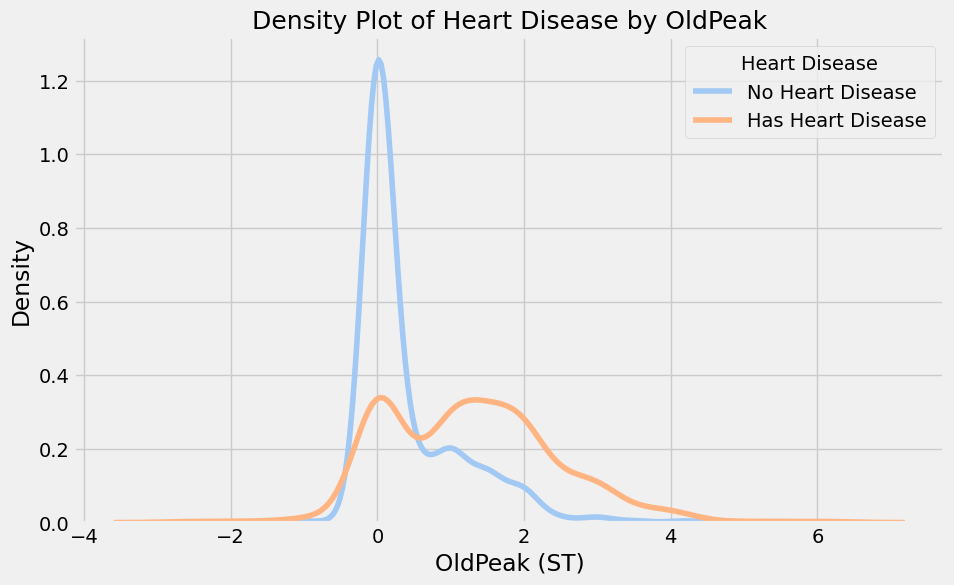

In [16]:
# Analyzing (df) the DataFrame containing your dataset
analysis = AnalyzeData(df)
analysis.analyze()

#### __Preliminary Insights:__
Analyzing this dataset with the AnalyzeData class provides valuable insights into the factors influencing heart disease occurrence. Categorical data reveals that male patients exhibit a significantly higher likelihood of heart disease than females. At the same time, the graphs show that patients with Asymptomatic (ASY) chest pain type and specific Resting Electrocardiogram abnormalities are associated with elevated heart disease risk. Additionally, features like Exercise-Induced Angina, ST slope, and fasting blood sugar levels above 120 mg/dL demonstrate higher prevalence in patients with heart disease. In continuous data, patients over 50 with lower maximum heart rates and higher Oldpeak values exhibit increased susceptibility to heart disease.


#### Categorical data:

* Sex: __Male patients__ are more likely (approximately 61%) to have heart disease than female patients (approximately 26%).
* ChestPainType: Patients with __ASY type of chest pain__ are more likely to have heart disease than patients with other types of chest pains. (ASY: Asymptomatic Chest Pain, sometimes described as silent due to a lack of intensity compared to a heart attack)
* RestingECG- Patients with Resting electrocardiograms that show __ST-T wave abnormality (labeled ST)__ are more likely to have heart disease
* ExerciseAngina: Patients with this feature __(ExerciseAngina) labeled `yes`__ are more likely to have heart disease
* ST_slope: Patients with this feature __(ST_slope) labeled `Flat` or `Down`__ are more likely than patients with this feature labeled `Up`.
* FastingBS: Patients with __fasting blood sugar > 120 mg/dL__ are more likely to have heart disease.

#### Continuous/Numeric data:

* Age: Patients __over 50__ are more likely to have heart disease
* RestingBP: difficult to quanitify with data (higher resting blood pressure >100 bpm slightly more likely to have heart disease)
* Cholesterol: difficult to quantity with data
* MaxHR: Patients with lower maximum heart rate are more likely to have heart disease ( values <100)
* Oldpeak: Patients with higher old peak values are more likely to have heart disease (values > 1)

### __Data Preparation for Modeling__

In [17]:
# Importing necessary modules
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from keras.models import Sequential
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.metrics import Precision, Accuracy, Recall
from xgboost import XGBClassifier

# Define the BinaryClassifier class
class BinaryClassifier:
    def __init__(self, data):
        """
        Constructor for the BinaryClassifier class.

        Parameters:
        - data (pandas DataFrame): The dataset for the classifier.
        """

        self.data = data
        self.scaler = StandardScaler()

        # Define a library of models
        self.models = {
            'Logistic Regression': LogisticRegression(max_iter=1000),
            'Decision Trees': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'XGBoost': XGBClassifier(),  # Add XGBoost here
            'Neural Network': None
        }

    def preprocess_data(self):
        # Separate features (X) and target variable (y)
        X = self.data.drop('HeartDisease', axis=1)
        y = self.data['HeartDisease']

        # Assuming y contains string labels 'Has Heart Disease' and 'No Heart Disease'
        y_binary = (y == 'Has Heart Disease').astype(int)

        # One-hot encode categorical variables
        X_encoded = pd.get_dummies(X)

        # Scale the input features
        X_scaled = self.scaler.fit_transform(X_encoded)

        return X_scaled, y_binary

    def train_model(self, X, y):
        """
        Trains the binary classifier model on the preprocessed data.

        Parameters:
        - X (pandas DataFrame): The preprocessed feature data.
        - y (pandas DataFrame): The preprocessed target variable.
        - model_name (str): The name of the model to train.

        Returns:
        - model: The trained binary classifier model.
        """
        # Train each model in the library
        for model_name, model in self.models.items():
              if model_name == 'Neural Network':
                # Scale the input features
                X_scaled = self.scaler.fit_transform(X)

                # Build the neural network architecture
                model = models.Sequential([
                    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
                    Dropout(0.2),
                    Dense(64, activation='relu'),
                    Dropout(0.2),
                    Dense(64, activation='relu'),
                    Dropout(0.2),
                    Dense(1, activation='sigmoid')
                ])
                # Define custom metrics
                metrics =[
                    Precision(name='precision'),
                    'accuracy',
                    Recall(name='recall')
                ]
                # Compile the model
                model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

                # Train the model
                model.fit(X_scaled, y, epochs=25, batch_size=32, verbose=0)

                # Set the trained model in the models dictionary
                self.models[model_name] = model
              else:
                model.fit(X, y)

        # Return the trained models dictionary
        return self.models

    def predict(self, X_test):
        """
        Predicts the target variable values using all the trained models.

        Parameters:
        - X_test (pandas DataFrame): Testing feature data.

        Returns:
        - predictions (dict): Dictionary containing the predictions of each model.
        """
        predictions = {}

        # Iterate through each model and make predictions
        for model_name, model in self.models.items():
            model_predictions = model.predict(X_test)
            predictions[model_name] = model_predictions

        return predictions

    def tune_parameters(self, classifier, param_grid, X, y, scorer):
        """
        Tune hyperparameters of the given classifier using GridSearchCV.

        Parameters:
        - classifier: The classifier to be tuned.
        - param_grid: The dictionary containing hyperparameter grids for the classifier.
        - X (pandas DataFrame): The preprocessed feature data.
        - y (pandas DataFrame): The preprocessed target variable.
        - scorer: Scorer function to evaluate the models.

        Returns:
        - best_params: The best hyperparameters found by GridSearchCV.
        - best_score: The best recall score achieved by the classifier.
        """

        # Perform grid search for hyperparameter tuning
        grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring=scorer, cv=5)
        grid_search.fit(X, y)

        # Get the best hyperparameters and score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        return best_params, best_score

    def train_model_with_parameter_tuning(self, X, y):
        """
        Trains the Binary classifier model with parameter tuning on the preprocessed data.

        Parameters:

        - X (pandas DataFrame): The preprocessed feature data.
        - y (pandas DataFrame): The preprocessed target variable.

        Returns:
        - model: The trained Binary classifier model with tuned hyperparameters.
        """

        # Define a library of models with default parameters
        models = {
            'Logistic Regression': LogisticRegression(),
            'K-Nearest Neighbors': KNeighborsClassifier(),
            'Support Vector Machine': SVC(),
            'Decision Trees': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'XGBoost': XGBClassifier(),  # Added XGBoost here
            'Neural Network': None  # Added Neural Network here
        }

        # Define a library of parameter grids for each model
        param_grid = {
                'Logistic Regression': {'C': [0.1, 1.0, 10.0]},
                'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
                'Support Vector Machine': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
                'Decision Trees': {'max_depth': [None, 5, 10]},
                'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
                'XGBoost':{'n_estimators': [500,1000, 2000], 'max_depth': [None, 5, 10]},
                 'learning_rate': [0.1, 0.01, 0.001], # Added XGBoost parameters here
                'Neural Network': {'hidden_layer_sizes': [(64,), (128,), (512,)],
                                   'activation': ['relu', 'softmax', 'logistic'],
                                   'alpha': [0.0001, 0.001, 0.01],
                                   'learning_rate': ['constant', 'adaptive'],
                                   }
                 }


        # Create an empty dictionary to store the best models with tuned parameters
        best_models = {}
        best_recall_scores = {}
        # Define custom metrics
        metrics =[
            Precision(name='precision'),
            'accuracy',
            Recall(name='recall')
        ]
        # Iterate through each model in the library and perform grid search for parameter tuning
        for model_name, model in models.items():
            if model_name == 'Neural Network':
                # Scale the input features
                X_scaled = self.scaler.fit_transform(X)

                # Build the neural network architecture
                nn_model = Sequential([
                    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
                    Dropout(0.1),
                    Dense(128, activation='relu'),
                    Dropout(0.1),
                    Dense(512, activation='relu'),
                    Dropout(0.1),
                    Dense(1, activation='sigmoid')
                ])

                # Compile the model
                nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

                # Train the model
                nn_model.fit(X_scaled, y, epochs=25, batch_size=32, verbose=0)

                # Store the trained model in the models dictionary
                best_models[model_name] = nn_model

            else:
                # Get the corresponding parameter grid for the model
                model_param_grid = param_grid[model_name]

                # Perform parameter tuning using the tune_parameters function
                best_params, best_score = self.tune_parameters(model, model_param_grid, X, y,
                                                              scorer=make_scorer(recall_score, average='weighted'))

                # Set the best hyperparameters to the model
                model.set_params(**best_params)

                # Train the model with the best hyperparameters
                model.fit(X, y)

                # Store the best model in the dictionary
                best_models[model_name] = model
                best_recall_scores[model_name] = best_score
        # Store the trained models with tuned parameters
        self.models = best_models

        # Identify the most performative model
        most_performative_model = max(best_recall_scores, key=best_recall_scores.get)

        print(best_recall_scores)
        print(f'The most performative model is {most_performative_model} with a recall score of {best_recall_scores[most_performative_model]}')

        # Return the dictionary of best models and the most performative model
        return best_models, most_performative_model

    def evaluate_model(self, model, X_test, y_test):
        """
        Evaluates the binary classifier model on the test data.

        Parameters:
        - model: The trained binary classifier model.
        - X_test (pandas DataFrame): Testing feature data.
        - y_test (pandas DataFrame): True labels for testing data.

        Returns:
        - report (str): Classification report with metrics.
        - accuracy (float): Accuracy score.
        """

        # Predict the target variable values
        y_pred = model.predict(X_test)

        # Convert true and predicted labels to binary format (0 or 1)
        y_test_binary = (y_test == 'Has Heart Disease').astype(int)
        y_pred_binary = (y_pred == 'Has Heart Disease').astype(int)

        # Generate a classification report
        report = classification_report(y_test_binary, y_pred_binary)

        # Calculate the evaluation metrics
        accuracy = accuracy_score(y_test_binary, y_pred_binary)
        recall = recall_score(y_test_binary, y_pred_binary)
        precision = precision_score(y_test_binary, y_pred_binary)
        f1 = f1_score(y_test_binary, y_pred_binary)

        return report, accuracy, recall, precision, f1

    def print_model_information(self):
        """
        Print information about the trained models.
        """
        for model_name, model in self.models.items():
            if model_name == 'Neural Network':
                print(f"Model: {model_name}")
                print("Architecture:")
                model.summary()
                print("------------------------------")
            else:
                print(f"Model: {model_name}")
                print("Best Hyperparameters:", model.get_params())
                print("------------------------------")


I used the `BinaryClassifier` class to train and evaluate binary classification models on a given dataset. It provides methods for preprocessing data, training various models, making predictions, tuning hyperparameters, and evaluating model performance. Additionally, it includes a way to print information about the trained models, including their architectures and hyperparameters.

The class initializes with a dataset and a library of models, including Logistic Regression, Decision Trees, Random Forest, XGBoost, and a placeholder for a Neural Network. It also includes methods for data preprocessing, training models, making predictions, and evaluating model performance. The class allows for hyperparameter tuning using GridSearchCV. If the chosen model is a Neural Network, it specifies a specific architecture for training.

Lastly, it provides a method to print information about the trained models, including model summaries and best hyperparameters.

# Modeling

### Define the problem as a classification task


### Model Selection:
- Implementing machine learning methods like Random Forest, XGBoost for heart failure prediction

- Implementing a neural network-based model (ex. tensorflow or pytorch)



### Model Training:
* Training the selected models on the training data

In [18]:
# Use the binaryclassifier on the DataFrame 'df' that contains your heart disease data
binary_classifier = BinaryClassifier(df)

# Preprocess the data
X_scaled, y_binary = binary_classifier.preprocess_data()

# Split the data into training and testing sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)



# Train a model (for example, using Logistic Regression)
model = binary_classifier.train_model(X_scaled, y_binary)

# Print model information
binary_classifier.print_model_information()

Model: Logistic Regression
Best Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
------------------------------
Model: Decision Trees
Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
------------------------------
Model: Random Forest
Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2,

In [19]:
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


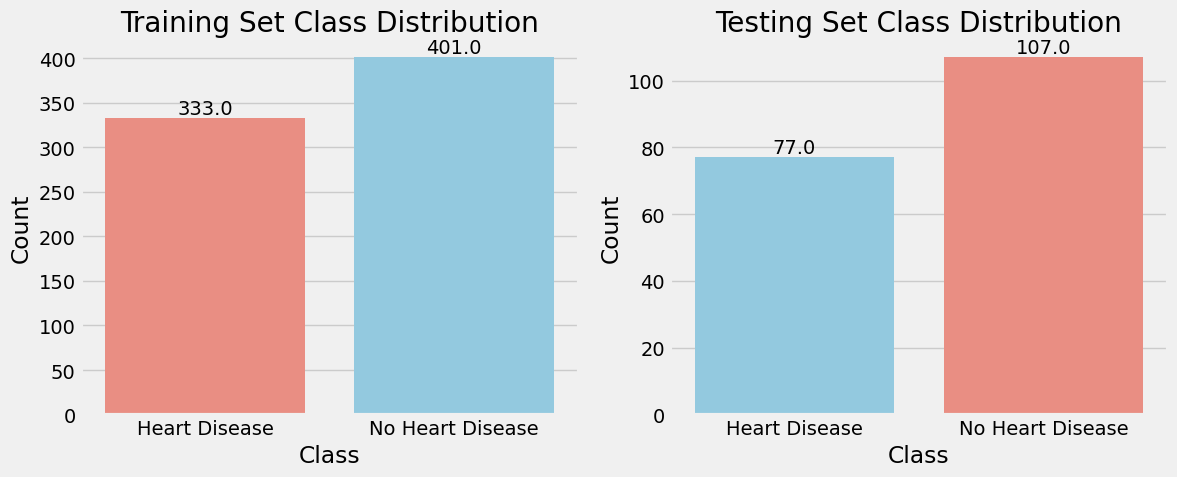

In [20]:
def plot_class_distribution(y_train, y_test):
    """
    Plots the class distribution for training and testing sets separately.

    Parameters:
    - y_train (pandas Series): True labels for training data.
    - y_test (pandas Series): True labels for testing data.
    """
    # Map numerical labels to categorical labels
    label_mapping = {0: 'Heart Disease', 1: 'No Heart Disease'}  # Adjusted mapping


    # Map numerical labels to categorical labels
    y_train_categorical = y_train.map(label_mapping)
    y_test_categorical = y_test.map(label_mapping)

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Define custom colors for the bars
    colors_1 = ['salmon', 'skyblue']
    colors_2 = ['skyblue', 'salmon']


    # Plot the class distribution in the training set
    sns.countplot(x=y_train_categorical, palette={label: color for label, color in zip(y_train_categorical.unique(), colors_1)}, ax=axes[0])
    axes[0].set_title('Training Set Class Distribution')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')

    # Add numbers on top of the bars
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    # Plot the class distribution in the testing set
    sns.countplot(x=y_test_categorical, palette={label: color for label, color in zip(y_test_categorical.unique(), colors_2)}, ax=axes[1])
    axes[1].set_title('Testing Set Class Distribution')
    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Count')

    # Add numbers on top of the bars
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

# Visualize the class distribution
plot_class_distribution(y_train, y_test)

## Evaluation


* Presenting the model evaluation results

* Comparing the performance of different models

In [21]:
class ModelEvaluation:
    def __init__(self, X_train, y_train, X_test, y_test):
        """
        Constructor for the ModelEvaluation class.

        Parameters:
        - X_train (pandas DataFrame): Training feature data.
        - y_train (pandas Series or numpy array): Training target variable.
        - X_test (pandas DataFrame): Testing feature data.
        - y_test (pandas Series or numpy array): Testing target variable.
        """
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.models = None
        self.evaluation_df = None
        self.feature_importance_df = None


    def evaluate_models(self, classifier):
        """
        Evaluates different classifier models and stores the evaluation results in a dataframe.

        Parameters:
        - classifier (BinaryClassifier): The BinaryClassifier instance.

        Returns:
        - evaluation_df (pandas DataFrame): The evaluation results dataframe.
        """
        models = classifier.train_model(self.X_train, self.y_train)
        self.models = models

        evaluation_results = []
        for model_name, model in models.items():
            y_pred = model.predict(self.X_test)

            # Convert predicted probabilities to binary labels
            y_pred_binary = (y_pred >0.5).astype(int)

            accuracy = accuracy_score(self.y_test, y_pred_binary)
            precision = precision_score(self.y_test, y_pred_binary, average='weighted')
            recall = recall_score(self.y_test, y_pred_binary, average='weighted')
            f1 = f1_score(self.y_test, y_pred_binary, average='weighted')

            evaluation_results.append({
                'Model': model_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1
            })

        evaluation_df = pd.DataFrame(evaluation_results)
        self.evaluation_df = evaluation_df

        return evaluation_df

    def analyze_feature_importances(self):
        """
        Analyzes and stores feature importances for the RandomForestClassifier.

        Returns:
        - feature_importance_df (pandas DataFrame): The feature importances dataframe.
        """
        if 'Random Forest' in self.models:
            random_forest_model = self.models['Random Forest']
            if hasattr(random_forest_model, 'feature_importances_'):
                feature_importances = random_forest_model.feature_importances_
                feature_importance_df = pd.DataFrame({'Feature': self.X_train.columns, 'Importance': feature_importances})
                self.feature_importance_df = feature_importance_df
                return feature_importance_df.info()
            else:
                print("Random Forest model does not have feature importances.")
        else:
            print("Random Forest model not found in trained models.")

        return None

    def calculate_best_scores(self, param_grids, scoring):
        """
        Calculate the best scores using cross-validation with recall scoring for all specified models.

        Parameters:
        - param_grids (dict): Dictionary containing the parameter grids for each model.
        - scoring (str or callable): The scoring metric to use for evaluation.

        Returns:
        - best_scores (dict): Dictionary containing the best recall scores for each model.
        """
        best_scores = {}

        for model_name, model in self.models.items():
            param_grid = param_grids.get(model_name)

            if param_grid is not None:
                grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
                grid_search.fit(self.X_train, self.y_train)

                best_scores[model_name] = grid_search.best_score_

        return best_scores

    def calculate_best_scores_xgboost(self, param_grids, scoring):
        best_scores = {}

        for model_name, param_grid in param_grids.items():
            model = XGBClassifier()
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
            grid_search.fit(self.X_train, self.y_train)

            best_scores[model_name] = grid_search.best_score_

        return best_scores



    def calculate_best_scores_nn(self, input_dim, scoring):
        best_scores = {}

        for model_name, _ in self.models.items():
            model = self.create_nn_model(input_dim)
            grid_search = GridSearchCV(estimator=model, param_grid={}, scoring=scoring, cv=5)  # No hyperparameters for this simple model
            grid_search.fit(self.X_train, self.y_train)

            best_scores[model_name] = grid_search.best_score_

        return best_scores

    def calculate_confusion_matrices(self, X_test, y_test):
        """
        Calculates and returns the confusion matrices for all evaluated models.

        Parameter:

        - X_test (pandas DataFrame): Testing feature data.
        - y_test (pandas Series/ numpy array): Testing target variable.

        Returns:
        - confusion_matrices (dict): Dictionary containing confusion matrices
        """
        confusion_matrices = {}

        for model_name, model in self.models.items():
            y_pred = model.predict(X_test)
            cm = confusion_matrix(y_test, y_pred_binary)
            confusion_matrices[model_name] = cm
        return confusion_matrices

    def plot_confusion_matrices(self, X_test, y_test):
        """
        Plots normalized confusion matrix for each evaluated model.

        Parameter:
        - X_test(pandas DataFrame): Testing feature data.
        - y_test(pandas Series or numpy array): Testing target variable.
        """

        for model_name, model in self.models.items():
            if hasattr(model, 'predict'):
                y_pred = model.predict(X_test)

                # Convert y_pred to a binary variable
                y_pred_binary = (y_pred > 0.5).astype(int)

                # Compute the confusion matrix
                cm = confusion_matrix(y_test, y_pred_binary)

                # Print the confusion matrix
                print(f"Confusion Matrix - {model_name}:")
                print(cm)

                # Calculate normalized confusion matrix
                cm_normed = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

                # Set the plot title and and labels
                plt.figure()
                sns.heatmap(cm_normed, annot=True, cmap='Blues', ax=plt.gca(), fmt=".2f",
                            xticklabels=["No Heart Disease", "Heart Disease"],
                            yticklabels=["No Heart Disease", "Heart Disease"])

                plt.title(f"Confusion Matrix - {model_name}")
                plt.xlabel("Predicted Label")
                plt.ylabel("True Label")

                # Show the plot
                plt.show()

    def plot_feature_importances(self, trained_models, feature_names):
        # Create a DataFrame to store feature importances
        feature_importances_df = pd.DataFrame(index=feature_names)

        for model_name, model in trained_models.items():
            if hasattr(model, 'feature_importances_'):
                # Get the feature importances from the model
                feature_importances = model.feature_importances_

                # Store the feature importances in the DataFrame
                feature_importances_df[model_name] = feature_importances

        # Plot the feature importances
        plt.figure(figsize=(12, 8))
        sns.barplot(data=feature_importances_df.T, x=feature_importances_df.columns,
                    y=feature_importances_df.T.mean(axis=1))
        plt.title('Feature Importances')
        plt.xticks(rotation=45, ha='right')
        plt.show()


    def identify_best_parameters(self, param_grids, scoring):
        """
        Identify the best parameters that yield the best recall score for all specified models.

        Parameters:
        - param_grids (dict): Dictionary containing the parameter grids for each model.
        - scoring (str or callable): The scoring metric to use for evaluation.

        Returns:
        - best_parameters (dict): Dictionary containing the best parameters for each model.
        - best_recall_scores (dict): Dictionary containing the best recall scores for each model.
        """

        best_parameters = {}
        best_recall_scores = {}

        for model_name, model in self.models.items():
            param_grid = param_grids.get(model_name)

            if param_grid is not None:
                if model_name == 'XGBoost':
                    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
                    grid_search.fit(self.X_train, self.y_train)

                    best_parameters[model_name] = grid_search.best_params_
                    best_recall_scores[model_name] = grid_search.best_score_
                elif model_name == 'Neural Network':
                    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                                      scoring=scoring, n_iter=10, cv=5, verbose=0, n_jobs=-1)
                    random_search.fit(self.X_train, self.y_train)

                    best_parameters[model_name] = random_search.best_params_
                    best_recall_scores[model_name] = random_search.best_score_
                else:
                    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
                    grid_search.fit(self.X_train, self.y_train)

                    best_parameters[model_name] = grid_search.best_params_
                    best_recall_scores[model_name] = grid_search.best_score_

        return best_parameters, best_recall_scores

    def perform_shap_analysis(self, model, X_data):
        # Create an explainer
        explainer = shap.Explainer(model)

        # Calculate SHAP values
        shap_values = explainer.shap_values(X_data)

        # Visualize SHAP values (you can use different visualization methods)
        shap.summary_plot(shap_values, X_data, feature_names=X_data.columns.tolist())

In [22]:
# Instantiate the ModelEvaluation class
model_evaluation = ModelEvaluation(X_train, y_train, X_test, y_test)


# Evaluate models
evaluation_results = model_evaluation.evaluate_models(binary_classifier)


# Display evaluation results
display(evaluation_results)


6/6 [==============================] - 0s 3ms/step


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.85,0.86,0.85,0.85
1,Decision Trees,0.80,0.81,0.80,0.80
2,Random Forest,0.88,0.88,0.88,0.88
3,XGBoost,0.88,0.88,0.88,0.88
4,Neural Network,0.92,0.92,0.92,0.92


Confusion Matrix - Logistic Regression:
[[67 10]
 [17 90]]


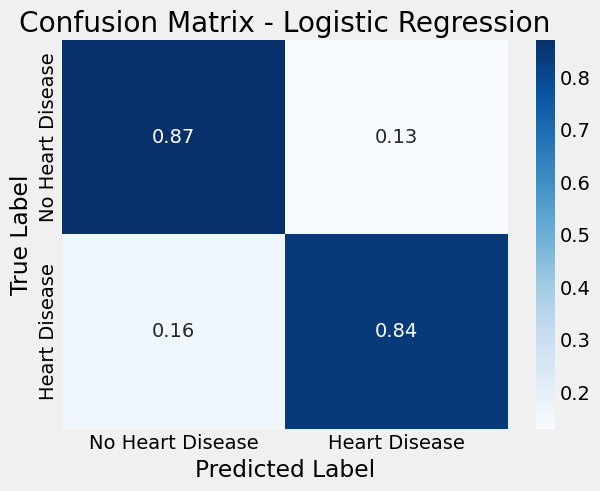

Confusion Matrix - Decision Trees:
[[65 12]
 [25 82]]


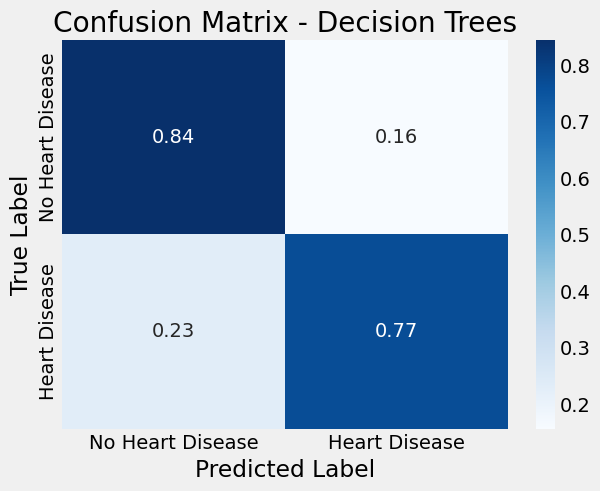

Confusion Matrix - Random Forest:
[[67 10]
 [12 95]]


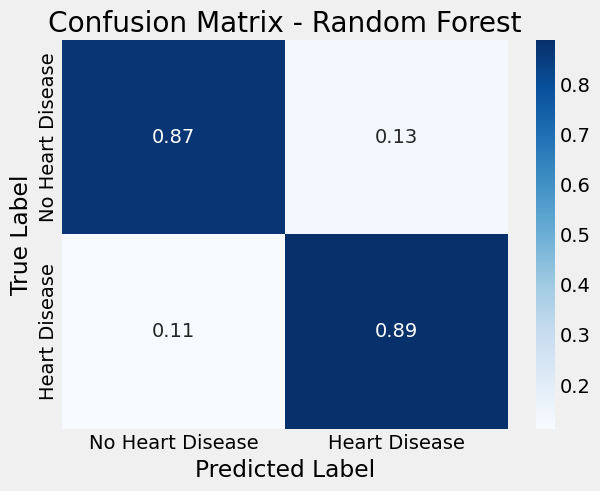

Confusion Matrix - XGBoost:
[[69  8]
 [15 92]]


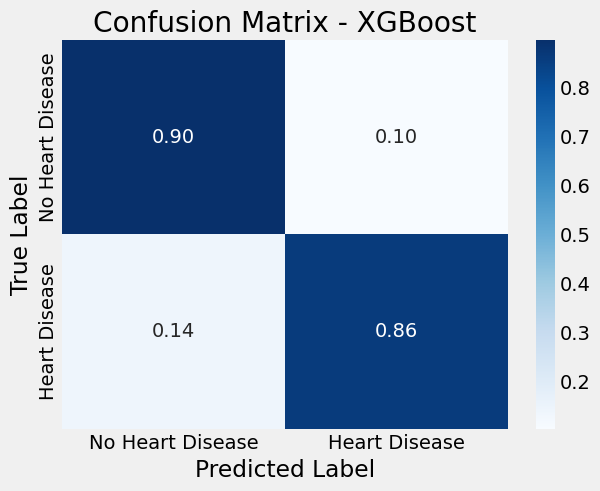

6/6 [==============================] - 0s 3ms/step
Confusion Matrix - Neural Network:
[[71  6]
 [ 9 98]]


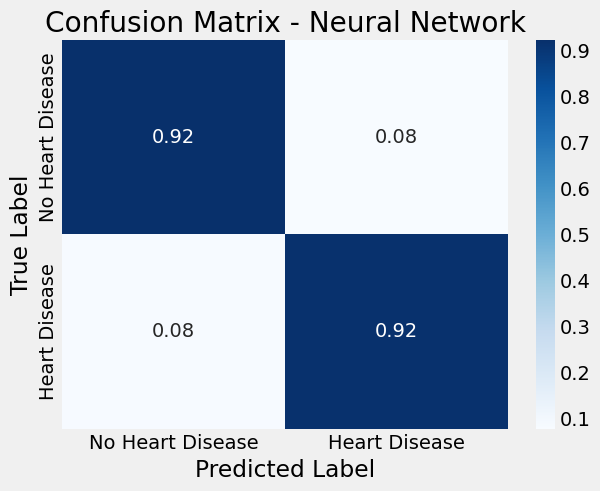

In [23]:
# Calculate and plot the confusion matrices
model_evaluation.plot_confusion_matrices(X_test, y_test)

In [24]:
# Train models with parameter tuning
best_models, revised_models = binary_classifier.train_model_with_parameter_tuning(X_train, y_train)



{'Logistic Regression': 0.8623893392973627, 'K-Nearest Neighbors': 0.8678594725561457, 'Support Vector Machine': 0.8651104277327368, 'Decision Trees': 0.8147236976982573, 'Random Forest': 0.8719317864131954, 'XGBoost': 0.856937843630603}
The most performative model is Random Forest with a recall score of 0.8719317864131954


In [25]:
# Print the best hyperparameters for each model
for model_name, model in best_models.items():
    print(f"Model: {model_name}")
    if model_name == 'Neural Network':
        print("Revised Neural Network Architecture:")
        print(model.summary())  # This will print the architecture of the Neural Network
    else:
        print("Best Hyperparameters:", model.get_params())
    print("------------------------------")



Model: Logistic Regression
Best Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
------------------------------
Model: K-Nearest Neighbors
Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
------------------------------
Model: Support Vector Machine
Best Hyperparameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
------------------------------
Model: Decision Trees
Best Hyperparameters: {'cc

In [26]:
# Evaluate revised models
revised_evaluation_results = model_evaluation.evaluate_models(binary_classifier)

# Display evaluation results
display(revised_evaluation_results)


6/6 [==============================] - 0s 2ms/step


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.85,0.86,0.85,0.85
1,K-Nearest Neighbors,0.86,0.87,0.86,0.86
2,Support Vector Machine,0.86,0.86,0.86,0.86
3,Decision Trees,0.86,0.87,0.86,0.86
4,Random Forest,0.86,0.87,0.86,0.86
5,XGBoost,0.88,0.88,0.88,0.88
6,Neural Network,0.89,0.89,0.89,0.89


In [27]:
!pip install shap # install shap used to calculate Shap values

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.3 MB/s eta 0:00:00


In [28]:
import shap # package used to calculate Shap values

In [29]:
help(shap.force_plot)

Help on function force in module shap.plots._force:

force(base_value, shap_values=None, features=None, feature_names=None, out_names=None, link='identity', plot_cmap='RdBu', matplotlib=False, show=True, figsize=(20, 3), ordering_keys=None, ordering_keys_time_format=None, text_rotation=0, contribution_threshold=0.05)
    Visualize the given SHAP values with an additive force layout.
    
    Parameters
    ----------
    base_value : float
        This is the reference value that the feature contributions start from.
        For SHAP values, it should be the value of ``explainer.expected_value``.
    
    shap_values : numpy.array
        Matrix of SHAP values (# features) or (# samples x # features). If this is a
        1D array, then a single force plot will be drawn. If it is a 2D array, then a
        stacked force plot will be drawn.
    
    features : numpy.array
        Matrix of feature values (# features) or (# samples x # features). This provides the values of all the
     

### __Evaluating Models with feature immprtances and SHAP__
The SHAP force plot I have generated provides valuable insights into how individual features impact the classification using neural network for the chosen instance. Here's a breakdown of the information from my force plot:

f(x) = 0.46: This represents the model's output or prediction for the chosen instance (choosen_instance), which is 0.46 in this case.

Base Value of 0.4573: The base value represents the expected model output when no specific features are considered. It's essentially the model's baseline prediction.

Age and RestingBP have the longest bars: The length of the bars in the force plot indicates the magnitude and direction of each feature's contribution to the prediction. In this case, "Age" and "RestingBP" have the longest bars, indicating that they have a significant impact on increasing the prediction from the baseline value of to a value that corresponds to a patient being classified as having HeartDisease.

MaxHR, Sex, and FastingBP: These features also contribute to the prediction, but their bars are shorter compared to "Age" and "RestingBP." This suggests that while they do influence the prediction, their impact is not as strong as the other two features.

Given the feature importances provided for each model, we can infer which features are deemed important across different algorithms for classifying a patient as having heart disease. Considering that the Random Forest model is the most performative, let's highlight the features that appear to be consistently influential across different models:

* ExerciseAngina:
    - Logistic Regression (Coefficient: 0.463)
    - Random Forest (Importance: 0.107)
    - Decision Trees (Importance: 0.073)
    - XGBoost (Importance: 0.066)

* ChestPainType:
  -  Logistic Regression (Coefficient: 0.407)
  -  Random Forest (Importance: 0.071)
  -  Decision Trees (Importance: 0.104)
  -  XGBoost (Importance: 0.013)

* RestingBP:

  - Logistic Regression (Coefficient: 0.450)
  - XGBoost (Importance: 0.031)

* FastingBS:

 - Logistic Regression (Coefficient: 0.354)
  - Random Forest (Importance: 0.083)

* Cholesterol:
  - Decision Trees (Importance: 0.043)

* Oldpeak:
  - Random Forest (Importance: 0.032)
  - XGBoost (Importance: 0.027)
* MaxHR:
  - Decision Trees (Importance: 0.059)
* RestingECG:
  - XGBoost (Importance: 0.041)
* Sex:
  - Decision Trees (Importance: 0.037)


Top 5 Coefficients for Logistic Regression:
ChestPainType: 0.5291931162424972
FastingBS: 0.4812620676957123
ExerciseAngina: 0.4368325719900832
RestingBP: 0.4323104575669425
ST_Slope: 0.2691641794938609


Top 5 Feature Importances for Random Forest:
ChestPainType: 0.09849453768531719
FastingBS: 0.09476366104924733
Age: 0.08947210696763051
Cholesterol: 0.08734887679757256
ExerciseAngina: 0.06528406865696122


Support Vector Machine model does not have feature importances.


Top 5 Feature Importances for Decision Trees:
ExerciseAngina: 0.08256103157632609
ChestPainType: 0.07833518958105046
Cholesterol: 0.04203186461781639
RestingECG: 0.040986622092459096
FastingBS: 0.040856507080564396


K-Nearest Neighbors model does not have feature importances.


Top 5 Feature Importances for XGBoost:
ExerciseAngina: 0.04049938544631004
RestingECG: 0.03328504040837288
RestingBP: 0.03304704651236534
Oldpeak: 0.02506616711616516
ST_Slope: 0.013544843532145023




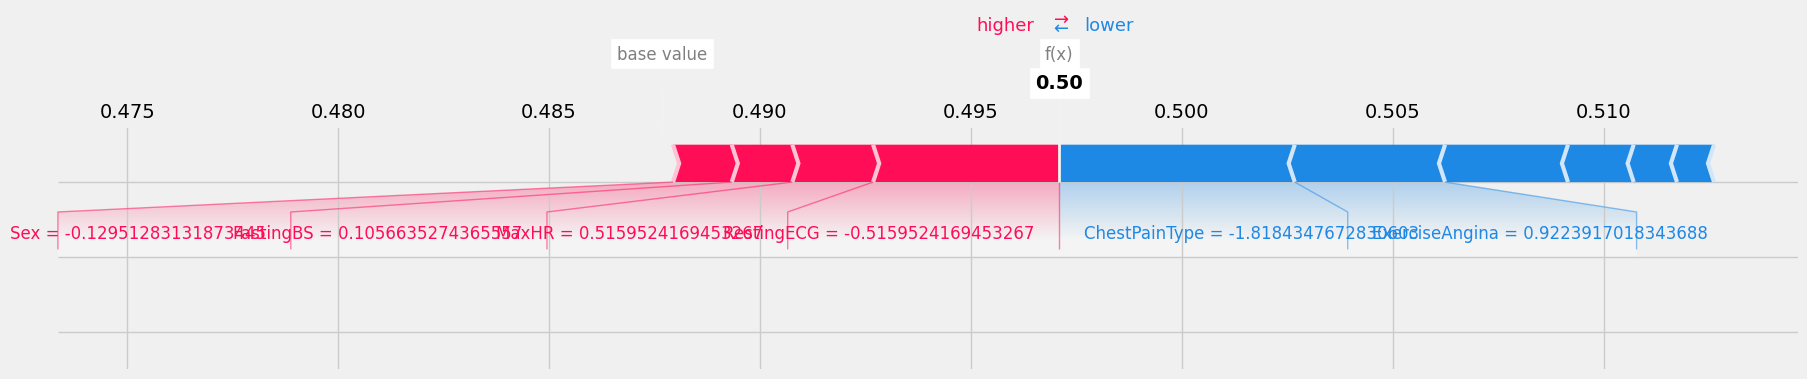

In [30]:
import shap
shap.initjs()

# Get the best model for each classifier
logistic_regression_model = best_models['Logistic Regression']
random_forest_model = best_models['Random Forest']
svm_model = best_models['Support Vector Machine']
decision_tree_model = best_models['Decision Trees']
knn_model = best_models['K-Nearest Neighbors']
xgb_model = best_models['XGBoost']
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

# Get the top 10 coefficients for Logistic Regression
if hasattr(logistic_regression_model, 'coef_'):
    coef_abs = abs(logistic_regression_model.coef_[0])
    top_5_coefficients = sorted(list(zip(binary_classifier.data.drop('HeartDisease', axis=1).columns, coef_abs)),
                                key=lambda x: x[1], reverse=True)[:5]
    print("Top 5 Coefficients for Logistic Regression:")
    for feature, coef in top_5_coefficients:
        print(f"{feature}: {coef}")
    print("\n")
else:
    print("Logistic Regression model does not have coefficients.")

# Get the top 5 feature importances for Random Forest, Support Vector Machines, Decision Trees, and K-Nearest Neighbors
models_to_analyze = [random_forest_model, svm_model, decision_tree_model, knn_model, xgb_model]
model_names = ['Random Forest', 'Support Vector Machine', 'Decision Trees', 'K-Nearest Neighbors', 'XGBoost']
#print('trace11')
for model, model_name in zip(models_to_analyze, model_names):
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        top_5_features = sorted(list(zip(binary_classifier.data.drop('HeartDisease', axis=1).columns,
                                         feature_importances)), key=lambda x: x[1], reverse=True)[:5]
        print(f"Top 5 Feature Importances for {model_name}:")
        for feature, importance in top_5_features:
            print(f"{feature}: {importance}")
        print("\n")
    else:
        print(f"{model_name} model does not have feature importances.")
        print("\n")

# Assuming X_test is your DataFrame
feature_names = binary_classifier.data.drop('HeartDisease', axis=1).columns.tolist()
#X_test_realigned = X_test[:, :-1]  # Select all columns except the last one (which is the target variable)

# Create an explainer
nn_explainer = shap.KernelExplainer(nn_model, X_train[:50,:])  # Pass X_train to the explainer


# Calculate SHAP values for a sample of data (X_test in this case)
nn_shap_values = nn_explainer.shap_values(X_test[3,:], nsamples=100)

# Visualize the SHAP values with specific feature names
ax = shap.force_plot(nn_explainer.expected_value[0], nn_shap_values[0], X_test[3,:], feature_names=feature_names, matplotlib=True)


For this SHAP explainer for the decision tree model
* __f(x) = 0.96:__

This represents the model's output or prediction for the chosen instance. In this case, the model predicts a value of approximately 0.70.
Base Value = 0.5518:

The base value is the expected output of the model when no specific features are considered. It serves as a reference point for understanding how the features contribute to the predicted value.
Longest Bars:

The length of the bars in the force plot indicates the magnitude and direction of each feature's contribution to the prediction. In this case, the features with the longest bars are:
ExerciseAngina
Cholesterol
FastingBS
MaxHR
These features have a significant impact on increasing the value from the base value

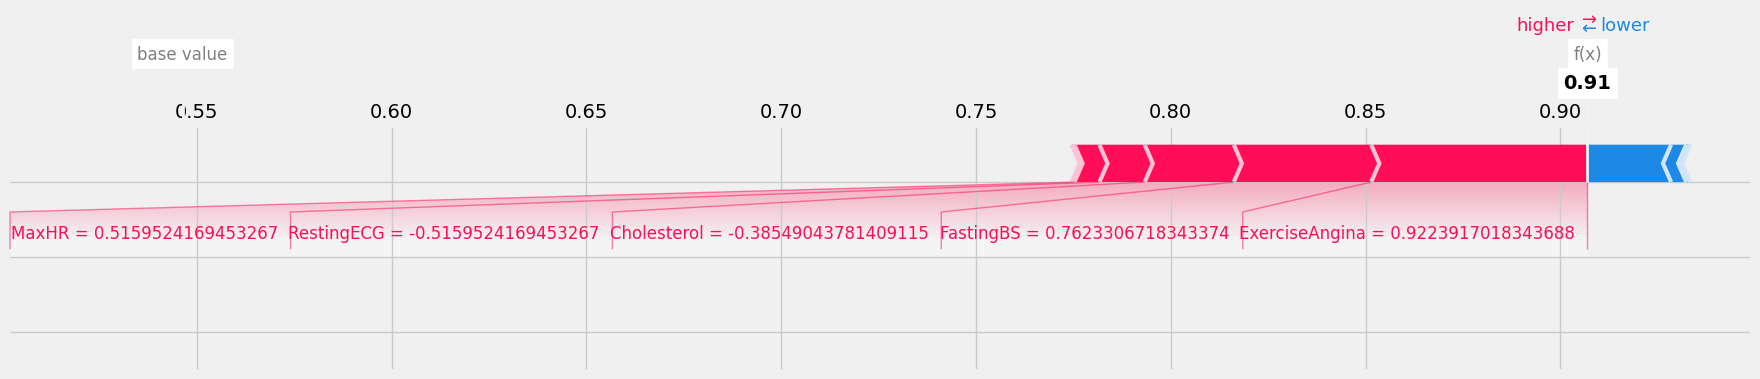

In [31]:
shap.initjs()

import shap  # package used to calculate Shap values

# Initialize a TreeExplainer object for the decision model
decision_tree_model.fit(X_train, y_train)
explainer = shap.TreeExplainer(decision_tree_model)

# Calculate the SHAP values for the chosen instance in X_test
choosen_instance = X_test[[84]]
shap_values = explainer.shap_values(choosen_instance)

# Generate a force plot to visualize the SHAP values for the 8th instance
# Note: The expected_value[1] is the base value for class 1 (assuming it's a binary classification problem)
# shap_values[1] contains SHAP values for class 1
# X_test[84] is the 84th instance
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance, feature_names=feature_names, matplotlib=True)




This code is using the SHAP (SHapely Additive exPlanations) library to generate a force plot for explaining the predictions of a random forest model.
1. shap.initjs(): This initializes the JavaScript visualization used by SHAP to render plots in Jupyter notebooks or other HTML environments.

This code generates a force plot to visualize the SHAP values for the 8th instance. It provides a detailed breakdown on how each feature impacts the model's output. explain.expected_value[1] is the base value for class 1, shap_values[1] contains the values for class 1 and indicates how each feature contributes to a prediction of class 1.
We want to look at the 8th instance of the test set.

The features ExerciseAngina, RestingBP, RestingECG, and MaxHR have the longest bars on the force plot, indicating they have the most significant influence on the prediction.

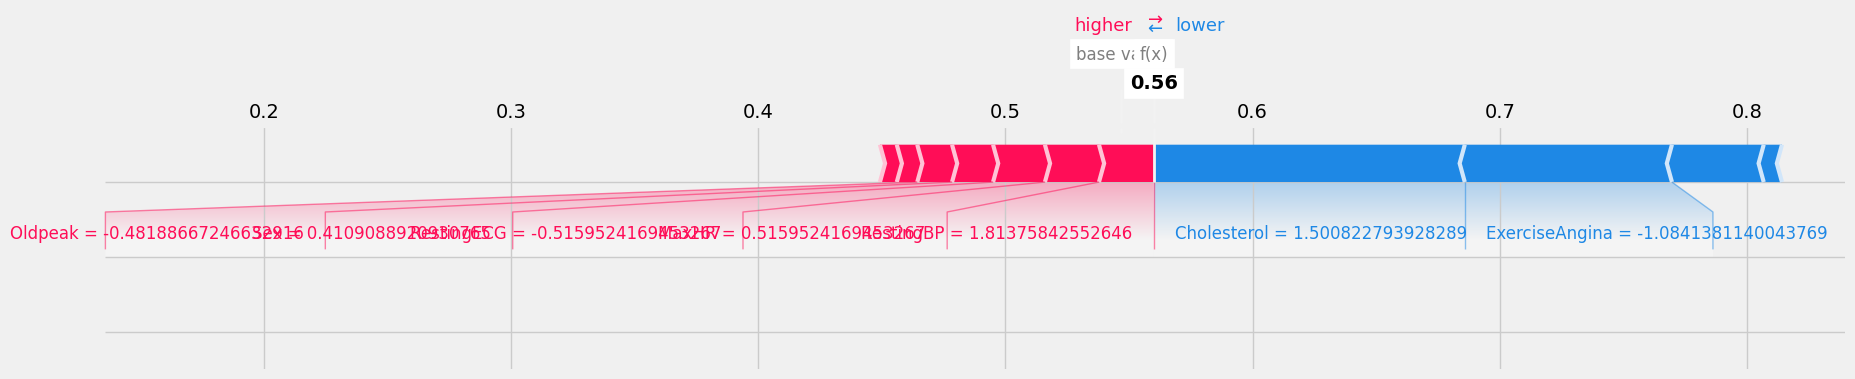

In [32]:
shap.initjs()

# Import the shap package for calculating Shap values
import shap  # package used to calculate Shap values

# Initialize a TreeExplainer object for the random forest model
explainer = shap.TreeExplainer(random_forest_model)

# Calculate the SHAP values for the 8th instance in X_test
shap_values = explainer.shap_values(X_test[8])

# Generate a force plot to visualize the SHAP values for the 8th instance
# Note: The expected_value[1] is the base value for class 1 (assuming it's a binary classification problem)
# shap_values[1] contains SHAP values for class 1
# X_test[8] is the 8th instance
# feature_names should be a list of feature names
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test[8], feature_names=feature_names, matplotlib=True)




While the importance values might vary between models, the recurrence of certain features, such as __ExerciseAngina, ChestPainType, and RestingBP__, across multiple models suggests their consistent significance in classifying a patient as having heart disease. It's advisable to place particular emphasis on these features when using a random forest model to classify this data.

## Deployment
1. __Web Application Development:__ Work in progress
  - Build a user-friendly web application that allows users to interact with your heart disease classification model. Consider using frameworks like Flask, Streamlit, or FastAPI for efficient development.
2. __Building a predictive system:__
  - Build the backend of the web app using the best parameters and most performative model
  - model should predict for one instance


In [33]:
# Define the hyperparameters
hyperparameters = {
    'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': 10,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 200,
    'n_jobs': None,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False
}

# Set the hyperparameters for the model
random_forest_model.set_params(**hyperparameters)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [34]:
# Metrics on training data
X_train_prediction = random_forest_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_recall = recall_score(X_train_prediction, y_train)
training_data_precision = precision_score(X_train_prediction, y_train)
training_data_f1_score  = f1_score(X_train_prediction, y_train)


In [35]:
# Evaluate most performative model on training data
print('Accuracy on Training data :', training_data_accuracy)
print('Recall on Training data :', training_data_recall)
print('Precision on Training data :', training_data_precision)
print('F1-Score on Training data :', training_data_f1_score)

Accuracy on Training data : 1.0
Recall on Training data : 1.0
Precision on Training data : 1.0
F1-Score on Training data : 1.0


In [36]:
# Metrics on testing data
X_test_prediction = random_forest_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
test_data_recall = recall_score(X_test_prediction, y_test)
test_data_precision = precision_score(X_test_prediction, y_test)
test_data_f1_score  = f1_score(X_test_prediction, y_test)


In [37]:
# Evaluate most performative model on testing data
print('Accuracy on Testing data :', test_data_accuracy)
print('Recall on Testing data :', test_data_recall)
print('Precision on Testing data :', test_data_precision)
print('F1-Score on Testing data :', test_data_f1_score)

Accuracy on Testing data : 0.8641304347826086
Recall on Testing data : 0.9019607843137255
Precision on Testing data : 0.8598130841121495
F1-Score on Testing data : 0.8803827751196173


In [38]:
# Define the input data
input_data = (48,	'F',	'ASY',	138,	214,	0,	'Normal',	108,	'Y',	1.50,	'Flat')

In [39]:
print(feature_names)

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [48]:
import pickle

In [49]:
# Save the model to a file

with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)

In [51]:
# Load the model from the saved file

with open('random_forest_model.pkl', 'rb') as model_file:
    random_forest_model = pickle.load(model_file)

In [52]:
from sklearn.preprocessing import StandardScaler

# Assuming binary_classifier is an instance of your BinaryClassifier class

# Drop the 'HeartDisease' column from the training data
X_train = binary_classifier.data.drop('HeartDisease', axis=1)

# Preprocess the training data
X_train_encoded = pd.get_dummies(X_train)
X_train_scaled = binary_classifier.scaler.fit_transform(X_train_encoded)
feature_names = X_train_encoded.columns
#print(feature_names)

# Define the target variable for training
y_train = binary_classifier.data['HeartDisease']

# Train the model (for example, using Random Forest)
# random_forest_model = best_models['Random Forest']
random_forest_model.fit(X_train_scaled, y_train)

# Define the input data
# Test data from the DataFrame where HeartDisease  target is known
# input_data = {'Age': 48, 'Sex': 'F', 'ChestPainType': 'ASY', 'RestingBP': 138, 'Cholesterol': 214,
#              'FastingBS': 0, 'RestingECG': 'Normal', 'MaxHR': 108, 'ExerciseAngina': 'Y', 'Oldpeak': 1.50,
#              'ST_Slope': 'Flat'} - Test for Person with Heart Disease
input_data = {'Age': 54, 'Sex': 'M', 'ChestPainType': 'NAP', 'RestingBP': 150, 'Cholesterol': 195,
              'FastingBS': 0, 'RestingECG': 'Normal', 'MaxHR': 122, 'ExerciseAngina': 'N', 'Oldpeak': 0.00,
             'ST_Slope': 'Up'}

# 54	M	NAP	150	195	0	Normal	122	N	0.00	Up	0
# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])

# Define a list of all possible categories for the categorical columns
categories = {
    'Sex': ['F', 'M'],
    'ChestPainType': ['ASY', 'ATA', 'NAP', 'TA'],
    'RestingECG': ['LVH', 'Normal', 'ST'],
    'ExerciseAngina': ['N', 'Y'],
    'ST_Slope': ['Down', 'Flat', 'Up']
}

# Create a new DataFrame with a single row
new_df = pd.DataFrame(columns=feature_names, data=[[input_data[col] if col in input_data else 0 for col in feature_names]])

# Set the values based on the input data
for col, val in input_data.items():
    if col in categories:
        for category in categories[col]:
            new_col = f'{col}_{category}'
            if category == val:
                new_df[new_col] = 1
            else:
                new_df[new_col] = 0
    else:
        new_df[col] = val

# Assuming binary_classifier is an instance of your BinaryClassifier class
# Fit the StandardScaler on your original data
binary_classifier.scaler.fit(X_train_encoded)

# Now, you can transform your new input data
X_input_scaled = binary_classifier.scaler.transform(new_df)

# Make predictions using the random_forest_model
predictions = random_forest_model.predict(X_input_scaled)

# 'predictions' will contain the predicted labels for the input data
print(f'The person has', predictions[0].lower(),'.')

The person has no heart disease .


## Recommendations

1. __Use the Random Forest Model__: Given its performance across metrics including a recall > 0.85, consider prioritizing the Random Forest model for heart disease classification.

2. __Feature Importance Insights__: Focus on `ExerciseAngina`, `ChestPainType`, `RestingBP` as they consistently appear as top model influencers across various models.

3. __SHAP force plot Interpretation__: Leverage the SHAP for plot genrated for the random forest model. It provides valuable insights into how individual features impact the classification of a chosen istance.

4. __Consider Logistic Regression and Neural Network__: While the Random Forest Model is the most performative, Logistic Regression is known for being easier to understand and considering we will be using this in a clinical setting we should consider using models like Neural Networks that have been readily adopted in the medical community for similar tasks.




## Future Work

1. __Advanced Feature Engineering:__

  - Explore more sophisticated feature engineering techniques like interaction terms, polynomial features, or dimensionality reduction methods like PCA. These can help extract more meaningful information from the data.

2. Parallel Computing with XGBoost:

  - Leverage parallel processing capabilities offered by XGBoost. Utilize multi-threading or distributed computing techniques to expedite model training, especially when dealing with large datasets.

3. __User Feedback and Iterative Improvement:__
    - Gather feedback from web application users to identify improvement areas. Use this feedback to refine the model and the application interface iteratively.

4. __Optimization for GPU Usage:__
  - Fine-tune models to make optimal use of the T4 GPU. Experiment with different settings and configurations to maximize GPU performance.


### References

[1] Detrano, R., Jánosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology.

[2] Jánosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

[3] Fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved September 17, 2023, from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

[4] Rajpurkar, P., et al. (2017). Deep learning for chest radiograph diagnosis: A retrospective comparison of the CheXNeXt algorithm to practicing radiologists. PLOS Medicine, 15(11), e1002686. https://doi.org/10.1371/journal.pmed.1002686.
